In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extract time data from txt file

Extract contents into a DataFrame and save them in the `time-cost.csv`.

Contents of `time-cost.txt` are just a copy and paste from the outputs of `sort.c`.

> outputs are shown at [this](https://github.com/Forrest-Li/Sorting-Algorithm-Comparison/blob/master/Report.md#四執行結果 '四、執行結果') part of the [report.md](https://github.com/Forrest-Li/Sorting-Algorithm-Comparison/blob/master/Report.md 'report.md').

In [2]:
# Extract contents from txt file
time = "0"
times = [] # include time costs info
sort_method = "" # like HEAP_SORT
sort_num = 0 # like 150000
sort_meta = [] # include stuff like [HEAP_SORT_150000, ..., QUICK_SORT_200000, ...]
flag = 0

with open("time-cost.txt") as file:
    for line in file:
        line = line.strip()
        if line[:4] == ">>>>":
            if ("STARTS" in re.split(" ", line)):
                sort_method = "_".join(re.split(" ", line)[1:3])
            if ("ENDS" in re.split(" ", line)):
                flag = 1
                times.append(list(re.split(", ", time)))
                sort_meta.append("_".join([sort_method, str(sort_num)]))
                time = ""
        elif line[:2] == ">>":
            if flag != 1:
                times.append(list(re.split(", ", time)))
                sort_meta.append("_".join([sort_method, str(sort_num)]))
                time = ""
            flag = 0
            sort_num = re.split(" ", line)[1]
        else:
            time += line

times = times[1:]
sort_meta = sort_meta[1:]

In [3]:
from collections.abc import Sequence


def get_shape(lst, shape=()):
    """
    credit: https://stackoverflow.com/a/51961249/11954837
    
    returns the shape of nested lists similarly to numpy's shape.

    :param lst: the nested list
    :param shape: the shape up to the current recursion depth
    :return: the shape including the current depth
            (finally this will be the full depth)
    """

    if not isinstance(lst, Sequence):
        # base case
        return shape

    # peek ahead and assure all lists in the next depth
    # have the same length
    if isinstance(lst[0], Sequence):
        l = len(lst[0])
        if not all(len(item) == l for item in lst):
            msg = 'not all lists have the same length'
            raise ValueError(msg)

    shape += (len(lst), )

    # recurse
    shape = get_shape(lst[0], shape)

    return shape

In [4]:
for s in sort_meta:
    print(s)

for t in times:
    print(t)

BUBBLE_SORT_50000
BUBBLE_SORT_100000
BUBBLE_SORT_150000
BUBBLE_SORT_200000
BUBBLE_SORT_250000
BUBBLE_SORT_300000
INSERTION_SORT_50000
INSERTION_SORT_100000
INSERTION_SORT_150000
INSERTION_SORT_200000
INSERTION_SORT_250000
INSERTION_SORT_300000
SELECTION_SORT_50000
SELECTION_SORT_100000
SELECTION_SORT_150000
SELECTION_SORT_200000
SELECTION_SORT_250000
SELECTION_SORT_300000
QUICK_SORT_50000
QUICK_SORT_100000
QUICK_SORT_150000
QUICK_SORT_200000
QUICK_SORT_250000
QUICK_SORT_300000
HEAP_SORT_50000
HEAP_SORT_100000
HEAP_SORT_150000
HEAP_SORT_200000
HEAP_SORT_250000
HEAP_SORT_300000
['10.703658', '10.645265', '10.683796', '10.681255', '10.672771', '10.660044', '10.667650', '10.672359', '10.640214', '10.671845', '10.688047', '10.631487', '10.662725', '10.680809', '10.680085', '10.673217', '10.640110', '10.672430', '10.630316', '10.675687', '10.633632', '10.651963', '10.669086', '10.609264', '10.624793,']
['42.971071', '43.036076', '43.366711', '43.331556', '43.244116', '43.338937', '43.304798'

In [5]:
# Transform the contents into a DataFrame
for i in range(len(times)):
    times[i] = [e.strip(',') for e in times[i]]
    times[i] = [float(e) for e in times[i]]

df_times = pd.DataFrame()

if(len(times) != len(sort_meta)): 
    print("Mismatched length.")
    exit(0)

for i in range(len(sort_meta)):
    df_times[sort_meta[i]] = times[i]

In [6]:
# I knew I can use nparray to get shape, but I like it this way ;)
print(get_shape(times))

(30, 25)


In [7]:
df_times

,BUBBLE_SORT_50000,BUBBLE_SORT_100000,BUBBLE_SORT_150000,BUBBLE_SORT_200000,BUBBLE_SORT_250000,BUBBLE_SORT_300000,INSERTION_SORT_50000,INSERTION_SORT_100000,INSERTION_SORT_150000,INSERTION_SORT_200000,...,QUICK_SORT_150000,QUICK_SORT_200000,QUICK_SORT_250000,QUICK_SORT_300000,HEAP_SORT_50000,HEAP_SORT_100000,HEAP_SORT_150000,HEAP_SORT_200000,HEAP_SORT_250000,HEAP_SORT_300000
0,10.703658,42.971071,97.645279,172.594701,270.776660,389.937600,1.624688,6.416114,14.454110,25.668683,...,0.035778,0.044487,0.061139,0.065127,0.015369,0.026874,0.057474,0.054888,0.065360,0.080754
1,10.645265,43.036076,96.971435,173.376832,270.546880,389.997138,1.624751,6.397353,14.390018,25.634028,...,0.036045,0.044936,0.049657,0.064938,0.015383,0.030160,0.042956,0.077654,0.071737,0.090897
2,10.683796,43.366711,97.199073,173.146706,270.648182,389.687579,1.616410,6.419847,14.451877,25.638483,...,0.034400,0.067426,0.056131,0.089512,0.016453,0.031143,0.044026,0.052875,0.069449,0.080238
3,10.681255,43.331556,97.314388,173.392800,270.755715,390.355695,1.604901,6.411758,14.395310,25.659461,...,0.033152,0.042247,0.054629,0.080909,0.015279,0.053421,0.044721,0.056140,0.065511,0.083508
4,10.672771,43.244116,97.466159,173.336044,270.454019,390.163875,1.603601,6.416570,14.432378,25.611890,...,0.035147,0.047531,0.070222,0.062380,0.015931,0.030375,0.060174,0.057553,0.069094,0.085163
5,10.660044,43.338937,97.247402,173.313141,270.798152,390.027575,1.609675,6.414917,14.408550,25.546128,...,0.033426,0.044537,0.076109,0.063737,0.015736,0.032261,0.056937,0.059201,0.069163,0.085314
6,10.667650,43.304798,97.455589,173.314165,270.360523,390.266334,1.598381,6.415787,14.441953,25.624905,...,0.052813,0.040499,0.054787,0.065594,0.014989,0.030147,0.042885,0.055150,0.085857,0.099786
7,10.672359,43.248920,97.452356,173.263654,270.713173,390.052402,1.606975,6.430779,14.461392,25.628036,...,0.033868,0.043448,0.055379,0.062502,0.015187,0.032018,0.044863,0.054952,0.066372,0.081539
8,10.640214,43.250052,97.631268,173.425119,270.611530,389.958057,1.595609,6.418530,14.390811,25.572277,...,0.035112,0.041403,0.054654,0.065469,0.015403,0.027804,0.043651,0.057197,0.076037,0.088761
9,10.671845,43.284378,97.431999,173.102536,270.941198,389.701398,1.607496,6.408961,14.378959,25.612247,...,0.034085,0.046249,0.057234,0.086340,0.016044,0.047559,0.061609,0.056211,0.069518,0.087151


In [8]:
df_times.to_csv("time-cost.csv", index=False)

## Do some visualization & comparison between algorithms

Consuming time between different algorithms on the same set scales

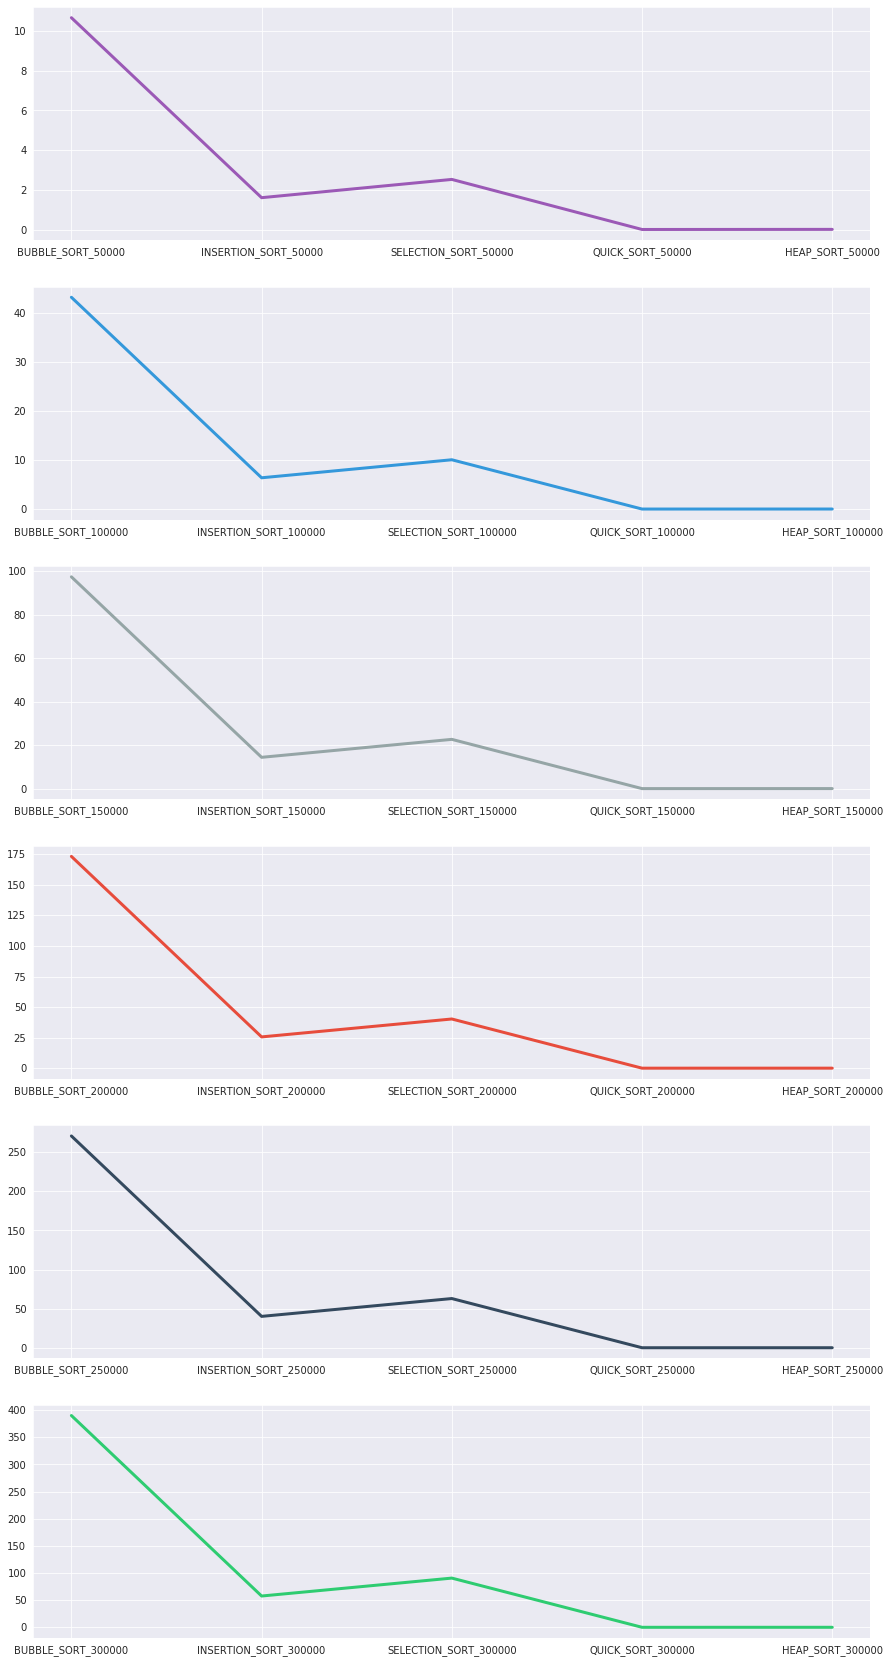

In [9]:
#fig, axes = plt.subplots(ncols=1, nrows=5, sharex=False, figsize=(15,15))
plt.figure(figsize=(15, 30))
sns.set_style('darkgrid')

plt.subplot(6, 1, 1)
data=df_times.describe().iloc[1][::6]
sns.lineplot(x=data.index, y=data.values, color='#9b59b6', sort=False, lw=3)

plt.subplot(6, 1, 2)
data=df_times.describe().iloc[1][1::6]
sns.lineplot(x=data.index, y=data.values, color='#3498db', sort=False, lw=3)

plt.subplot(6, 1, 3)
data=df_times.describe().iloc[1][2::6]
sns.lineplot(x=data.index, y=data.values, color='#95a5a6', sort=False, lw=3)

plt.subplot(6, 1, 4)
data=df_times.describe().iloc[1][3::6]
sns.lineplot(x=data.index, y=data.values, color='#e74c3c', sort=False, lw=3)

plt.subplot(6, 1, 5)
data=df_times.describe().iloc[1][4::6]
sns.lineplot(x=data.index, y=data.values, color='#34495e', sort=False, lw=3)

plt.subplot(6, 1, 6)
data=df_times.describe().iloc[1][5::6]
sns.lineplot(x=data.index, y=data.values, color='#2ecc71', sort=False, lw=3)

Consuming time on different set scales of the same algorithm

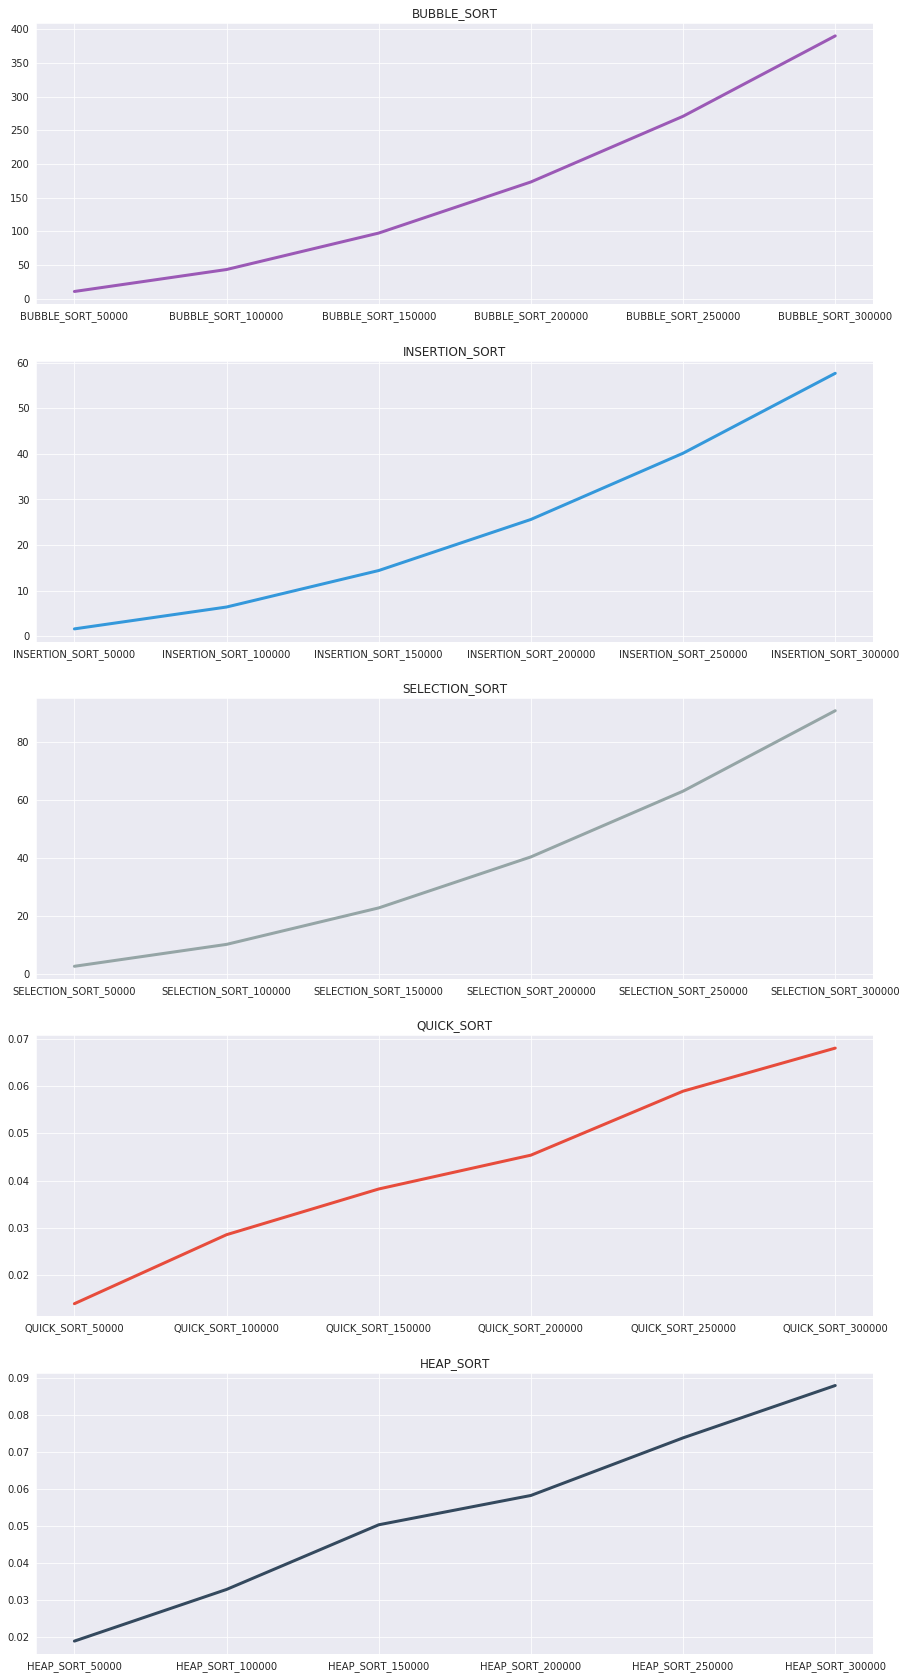

In [10]:
#fig, axes = plt.subplots(ncols=1, nrows=5, sharex=False, figsize=(15,15))
plt.figure(figsize=(15, 30))
sns.set_style('darkgrid')

plt.subplot(5, 1, 1)
data=df_times.describe().iloc[1][0:6]
plt.title('BUBBLE_SORT')
sns.lineplot(x=data.index, y=data.values, color='#9b59b6', sort=False, lw=3)

plt.subplot(5, 1, 2)
data=df_times.describe().iloc[1][6:12]
plt.title('INSERTION_SORT')
sns.lineplot(x=data.index, y=data.values, color='#3498db', sort=False, lw=3)

plt.subplot(5, 1, 3)
data=df_times.describe().iloc[1][12:18]
plt.title('SELECTION_SORT')
sns.lineplot(x=data.index, y=data.values, color='#95a5a6', sort=False, lw=3)

plt.subplot(5, 1, 4)
data=df_times.describe().iloc[1][18:24]
plt.title('QUICK_SORT')
sns.lineplot(x=data.index, y=data.values, color='#e74c3c', sort=False, lw=3)

plt.subplot(5, 1, 5)
data=df_times.describe().iloc[1][24:30]
plt.title('HEAP_SORT')
sns.lineplot(x=data.index, y=data.values, color='#34495e', sort=False, lw=3)

Put it all together.

Combine sorting time on different set scales of different algorithmes into one plot.

        BUBBLE_SORT  INSERTION_SORT  SELECTION_SORT  QUICK_SORT  HEAP_SORT
50000     10.660900        1.612404        2.530287    0.014000   0.018962
100000    43.267871        6.410080       10.088997    0.028580   0.032929
150000    97.369853       14.414861       22.669018    0.038236   0.050407
200000   173.232143       25.614911       40.258871    0.045384   0.058335
250000   270.726326       40.139887       62.930139    0.058903   0.073904
300000   390.039411       57.669760       90.669162    0.068003   0.088056


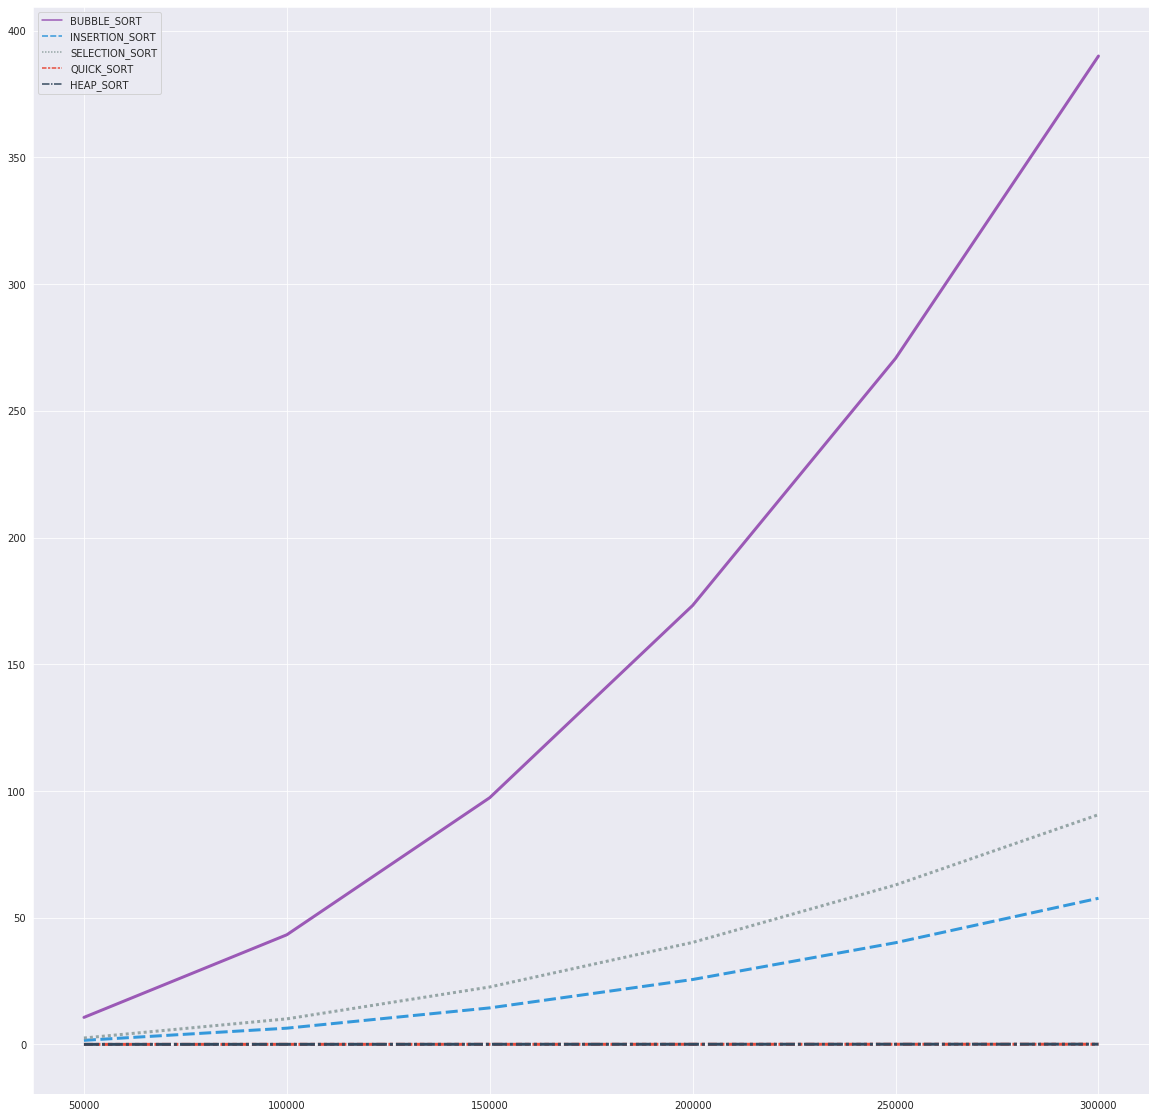

In [11]:
df_times2 = pd.DataFrame()
name = ['BUBBLE_SORT', 'INSERTION_SORT', 'SELECTION_SORT', 'QUICK_SORT', 'HEAP_SORT']
for i in range(0, 30, 6):
    row = df_times.describe().iloc[1][i:(i+6)]
    row.index = ['50000', '100000', '150000', '200000', '250000', '300000']
    df_times2.loc[:,name[i//6]] = row
print(df_times2)

plt.figure(figsize=(20, 20))
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e"]#, "#2ecc71"]
sns.lineplot(data=df_times2, sort=False, lw=3, palette=flatui)